# EL4013 : Programming with Data (Python Coursework Project) created by: Asad Ali
# Student ID : G21111398

#Project Description:
##Project Overview
The Online Payment Fraud Detection System is an advanced cybersecurity solution designed to identify and prevent fraudulent activities in online transactions. With the increasing prevalence of online payment platforms, ensuring the security of financial transactions has become a critical concern. This project aims to leverage machine learning and data analytics techniques to develop a robust fraud detection system for online payment systems.

##Key Features:

1.   Real-time Monitoring: Continuous analysis of transactions for anomalies.
2.   Machine Learning Models: Implement predictive models for fraud identification.
3. Feature Engineering: Extract and use relevant transaction data features.

##Dataset Description
Limited access to public datasets poses a challenge, particularly in the burgeoning field of mobile money transactions within the financial services domain. Researchers, including our team focusing on fraud detection, face difficulties due to the inherent privacy associated with financial transactions, resulting in a scarcity of publicly accessible datasets.

This dataset is created using PaySim. PaySim serves as a mobile money transaction simulator, generated from a subset of actual transactions derived from a month's worth of financial logs from a mobile money service operating in an African nation. The original logs were supplied by a multinational company, a key player in the mobile financial service sector, presently operational in over 14 countries globally.

##Overview of Dataset
This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance of sender before the transaction.

newbalanceOrig - new balance of sender after the transaction.

nameDest - customer who is the recipient of the transaction.

newbalanceDest - new balance of recipient after the transaction.

isFraud - The "isFraud" label in this dataset denotes transactions initiated by fraudulent agents within the simulation. In this context, fraudulent behavior involves attempting to gain unauthorized access to customer accounts with the goal of siphoning funds. This is achieved by transferring funds to another account and subsequently cashing out of the system.

isFlaggedFraud - isFlaggedFraud signifies a business strategy aimed at monitoring substantial transfers between accounts. This flag is activated in response to attempts that are deemed illegal or suspicious within the system.


#Research Question:
##With increase in emerging fraud techniques, How well does the fraud detection system adapt to these emerging fraud techniques and evolve with them in the rapidly changing landscape of online payment security? if not, how to improve the model to adapt to emerging fraud techniques?

Link for dataset is:
https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

**This notebook file is created using Google Colab. You can run this file in Jupyter as well. For running this file in jupyter notebook, make sure the dataset is uploaded in the same directory where the notebook file is stored. You don't need to mount Google Drive if you are using jupyter notebook.**

# Mounting Google Drive to access the dataset.
Our Dataset is stored in google drive. We need to mount google drive with google colab in order to use the dataset.

In [ ]:
from google.colab import drive # Mounting Google Drive with Google Colab to access the dataset stored on Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Required Libraries.
In this section we are importing the required python libraries that we will used to perform different data analysis and predictions.

In [ ]:
import numpy as np   #Numpy is a Python Library used for performing different mathematical and statistical tasks.
import pandas as pd  #Pandas is a Python Library used for easy and flexible data analysis and manipulation.
import matplotlib.pyplot as plt #Matplotlib is a python library
import seaborn as sb  # Importing seaborn library which is used for plotting statistical graphs.

# Importing Online Transaction Dataset from Google Drive.
In this section we will import the dataset and read the dataset csv file using pandas.


In [ ]:
Dataset = pd.read_csv('/content/drive/MyDrive/python_coursework/onlinefraud.csv') # Reading the dataset csv file using pandas from Google Colab and saving as DataFrame

print(Dataset.shape)    #Print the Number of rows and columns of the dataframe (Dataset)


(6362620, 11)


# Imporing Online Transaction Dataset from Local Drive (Run this code when you are using Jupyter to run this Notebook)

# Analyzing the Dataset and Performing Preprocessing.
In this section, we will analyze the dataset using different analyzing techniques and plot the analysis using matplotlib library.

In [ ]:
Dataset.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2494618,204,PAYMENT,11550.14,C1249432891,440.00,0.00,M373163208,0.00,0.00,0,0
3455841,257,PAYMENT,3251.38,C1842568864,0.00,0.00,M2088300474,0.00,0.00,0,0
4772013,335,CASH_IN,589.07,C1857409560,5073314.34,5073903.42,C257527001,123718.75,123129.68,0,0
4528222,326,CASH_IN,84923.98,C1522355464,404576.00,489499.98,C679578786,573997.35,489073.37,0,0
1062222,119,CASH_IN,159410.32,C1973401368,9980.00,169390.32,C1921581550,0.00,0.00,0,0
1074946,129,CASH_IN,197447.37,C1581915789,21760495.34,21957942.71,C1426789542,1935249.07,1737801.69,0,0
5281876,372,PAYMENT,5462.05,C1817323933,15260.00,9797.95,M1561572696,0.00,0.00,0,0
3170231,238,PAYMENT,5278.54,C1235651371,21916.00,16637.46,M18035883,0.00,0.00,0,0
4188576,305,TRANSFER,10000000.00,C587007061,206907.00,0.00,C2087201290,881022.80,36869195.34,0,0
5234607,371,PAYMENT,31436.06,C1197908175,0.00,0.00,M771389031,0.00,0.00,0,0


In [ ]:
#Getting information about Dataset. Column Names, Column data-type and number of rows (entries).
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Using describe() to find out the description of dataset.
#The describe funtion returns us the diffrent information about each column like number of counts, min value, max value, mean, std etc.
Dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#Trying to find out the number of entries with class label 'isFraud'
values=Dataset['isFraud'].value_counts()
print(values)

0    6354407
1       8213
Name: isFraud, dtype: int64


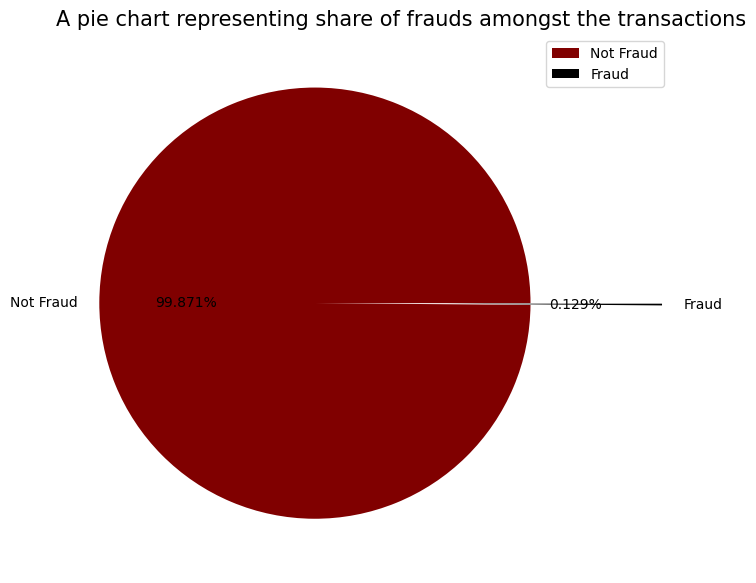

In [ ]:
#as we can see above that the number of values for Not Fraud=6354407 (isFraud=0) and Fraud=8213 (isFraud=1)
#trying to visualize the entries for each scenario using Pie chart
labels = ['Not Fraud', 'Fraud']
colors = ['maroon', 'black']
size = [values[0], values[1]]
explode = [0.4, 0.21]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = False,autopct = '%.3f%%')
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the transactions',fontsize = 15)
plt.legend()
plt.show()


In [ ]:
#Trying to find out the number of entries with class label 'isFlaggedFraud'
values1=Dataset['isFlaggedFraud'].value_counts()
print(values1)

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


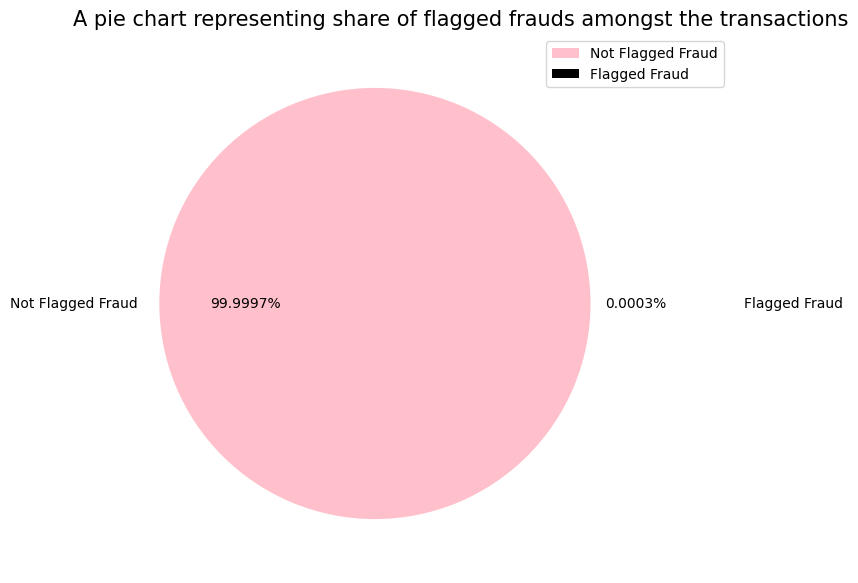

In [ ]:
#as we can see above that the number of values for Not Flagged Fraud=6362604 (isFlaggedFraud=0) and Flagged Fraud=16 (isFlaggedFraud=1)
#trying to visualize the entries for each scenario using Pie chart
labels = ['Not Flagged Fraud', 'Flagged Fraud']
colors = ['pink', 'black']
size = [values1[0], values1[1]]
explode = [0.4, 0.21]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = False,autopct = '%.4f%%')
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the transactions',fontsize = 15)
plt.legend()
plt.show()


In [ ]:
#Trying to find out the types of transaction and their counts.
Cashout=Dataset['type'].value_counts()
print(Cashout)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


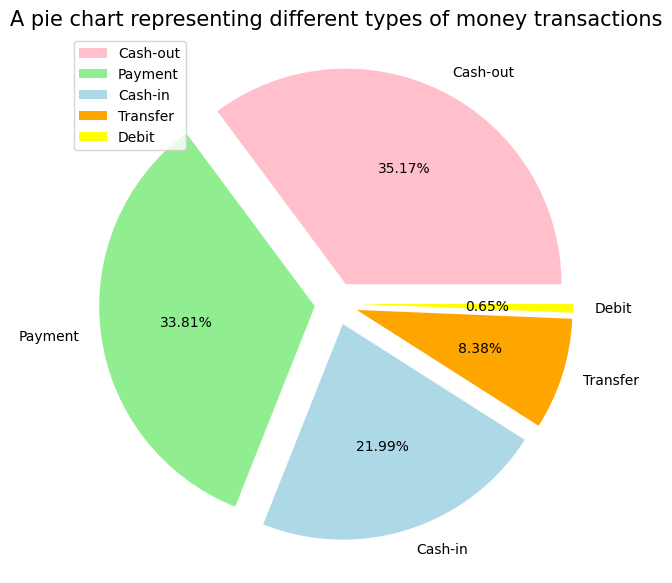

In [ ]:
#visualizing the counts of each type of transaction type using pie chart
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [Cashout[0], Cashout[1], Cashout[2], Cashout[3], Cashout[4]]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = False,autopct = '%.2f%%')
plt.title('A pie chart representing different types of money transactions', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

10000000.0    3207
10000.0         88
5000.0          79
15000.0         68
500.0           65
100000.0        42
21500.0         37
120000.0        29
135000.0        20
0.0             16
Name: amount, dtype: int64


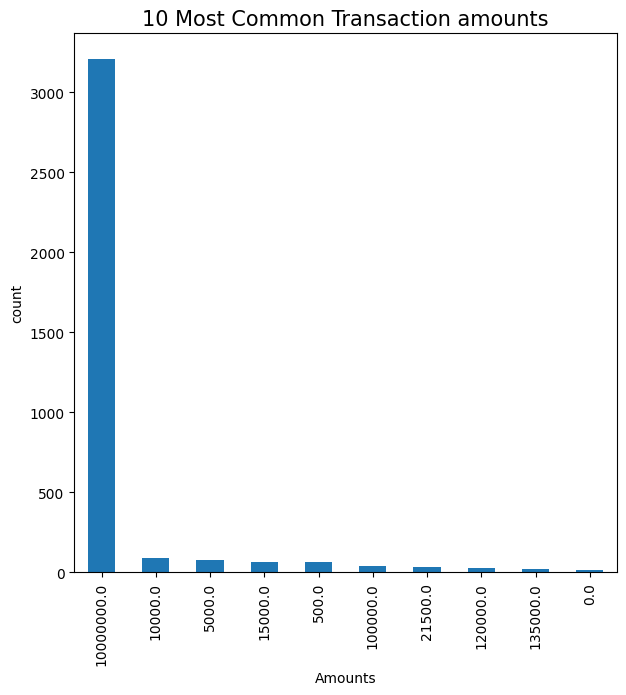

In [ ]:
#trying to find out the 10 most occurred transaction amounts
print(Dataset['amount'].value_counts().head(10))
plt.rcParams['figure.figsize'] = (7, 7)
Dataset['amount'].value_counts().head(10).plot.bar()
plt.title('10 Most Common Transaction amounts', fontsize = 15)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

352750.87    1
311168.17    1
218540.78    1
183795.40    1
418148.55    1
8513.48      1
189137.90    1
1615.78      1
128891.19    1
12257.89     1
Name: amount, dtype: int64


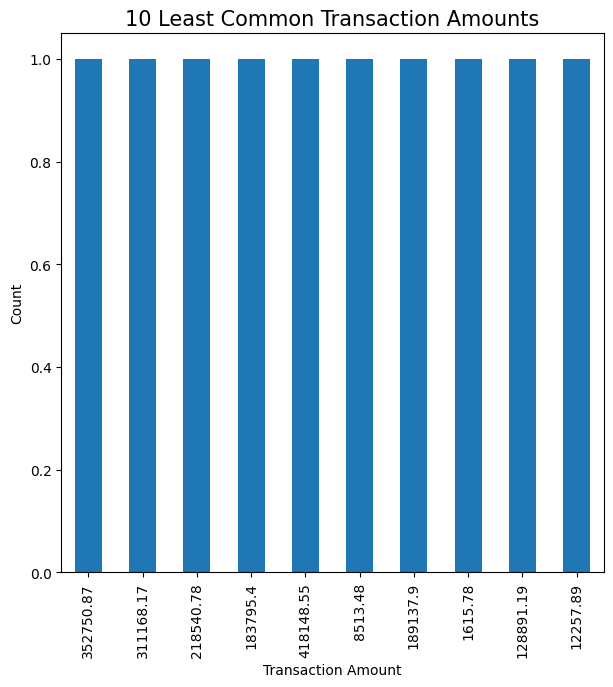

In [ ]:
#trying to find out the 10 least occurred transaction amounts
print(Dataset['amount'].value_counts().tail(10)) # printing 10 least occured values
plt.rcParams['figure.figsize'] = (7, 7)
Dataset['amount'].value_counts().tail(10).plot.bar()
plt.title('10 Least Common Transaction Amounts', fontsize = 15)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

In [ ]:
#trying to find out the types of fraudulent transaction types out of all the transaction modes.
print('The Types of fraudulent transactions are ',list(Dataset.loc[Dataset.isFraud == 1].type.drop_duplicates().values))

The Types of fraudulent transactions are  ['TRANSFER', 'CASH_OUT']


In [ ]:
#As we seen in the above cell that the transaction types which are fradulent are TRANSFER and CASH_OUT.
#Now we are trying to find out the number of fraud transfer and fraud cash outs
Fraud_Transfer = Dataset.loc[(Dataset.isFraud == 1) & (Dataset.type == 'TRANSFER')]
Fraud_Cashout = Dataset.loc[(Dataset.isFraud == 1) & (Dataset.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent transactions with type TRANSFER =',len(Fraud_Transfer))
print ('The number of fraudulent transactions with type CASH_OUT =',len(Fraud_Cashout))

The number of fraudulent transactions with type TRANSFER = 4097
The number of fraudulent transactions with type CASH_OUT = 4116


In [ ]:
#now we are trying to find out which type of transaction got flagged graud by the system
print("The Type of Transaction in which IsFlagged is true :", Dataset.loc[Dataset.isFlaggedFraud == 1].type.drop_duplicates().values)


The Type of Transaction in which IsFlagged is true : ['TRANSFER']


**As we can see that only transaction type TRANSFER and CASH_OUT is fradulent transactions. we can keep the entries with these transaction type and remove the other transaction type entries. We will create a new dataframe with dataset containing only transaction type TRANSFER and CASH_OUT.**

In [ ]:
#creating new dataframe from the Dataset with entries containing only transactiopn type TRANSFER and CASH_OUT.
New_Dataset= Dataset.loc[(Dataset.type == 'TRANSFER') | (Dataset.type == 'CASH_OUT')] #New Dataset Dataframe with only transactiopn type TRANSFER and CASH_OUT.
New_Dataset.shape #Printing the shape of new dataframe

(2770409, 11)

In [ ]:
New_Dataset.head(15)  # Printing the first 15 entries of new dataframe

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.00,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0


In [ ]:
New_Dataset.isnull().any() #trying to find out if there is any Null values in the dataset

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [ ]:
New_Dataset= New_Dataset.drop(['nameDest','nameOrig'], axis = 1) #Removing unwanted columns (Destination Account  name and Origin Account Name)

In [ ]:
New_Dataset.head(15)  #Printing first 15 entries of new dataset dataframe

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,705.00,0.00,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,10835.00,0.00,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,26845.41,0.00,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,1942.02,0.00,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,0.00,0.00,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,20411.53,0.00,25742.00,0.00,0,0
58,1,TRANSFER,62610.80,79114.00,16503.20,517.00,8383.29,0,0


In [ ]:
#As we can see that out datset contains the categorical data.
#We need to convert the categorical data into numerical data.
#Performing Label Encoding to convert TRANSFER to 0 (False) and CASH_OUT to 1 (True).
New_Dataset['type'].replace('TRANSFER', 0, inplace = True)
New_Dataset['type'].replace('CASH_OUT', 1, inplace = True)

In [ ]:
New_Dataset.head(15)  #Printing first 15 entries of new dataset dataframe.

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
15,1,1,229133.94,15325.00,0.00,5083.00,51513.44,0,0
19,1,0,215310.30,705.00,0.00,22425.00,0.00,0,0
24,1,0,311685.89,10835.00,0.00,6267.00,2719172.89,0,0
42,1,1,110414.71,26845.41,0.00,288800.00,2415.16,0,0
47,1,1,56953.90,1942.02,0.00,70253.00,64106.18,0,0
48,1,1,5346.89,0.00,0.00,652637.00,6453430.91,0,0
51,1,1,23261.30,20411.53,0.00,25742.00,0.00,0,0
58,1,0,62610.80,79114.00,16503.20,517.00,8383.29,0,0


**In below cell, we are splitting dataset into dependent and independent variables (target and features). In this project, our target variable is 'IsFraud' and all other variables are features except for 'IsFlaggedFraud'. isFlaggedFraud is the previous model results that we want to improve.**

In [ ]:
#splitting the dataset into Target and Features where X is Features and Y is target
X=New_Dataset.iloc[:,:-2] #Features
Y=New_Dataset.iloc[:,-2]  #Target

##Feature Selection using P value and Forward Selection Technique
In this section, we will try to find out the best features (columns) which will not effect the accuracy of our model.

In [ ]:
import statsmodels.api as sm  # Importing the statmodels which is a python library to perform statistics tasks.
model = sm.OLS(Y,X).fit()     # creating an instance of the Linear Regressor from Statsmodels
p_values=model.pvalues        #Calculating p-values for each column/feature
print('P_values of each column are ',p_values) #printing the p-values of each column



P_values of each column are  step              0.000000e+00
type              0.000000e+00
amount            1.510400e-03
oldbalanceOrg     0.000000e+00
newbalanceOrig    0.000000e+00
oldbalanceDest    4.130313e-86
newbalanceDest    8.676842e-99
dtype: float64


In [ ]:
values_to_be_excluded= [p_values for p_values in p_values if p_values > 0.005] #Checking if dataset have any p value greate than 0.005
print("Values greater than 0.005:", values_to_be_excluded) #print the values that are to be deleted if greater than threshold 0.005


Values greater than 0.005: []


In [ ]:
# checking the no. of frauds in the dataset
count=New_Dataset['isFraud'].value_counts() #Saving the count of IsFraud=True and IsFraud=False in count Variable

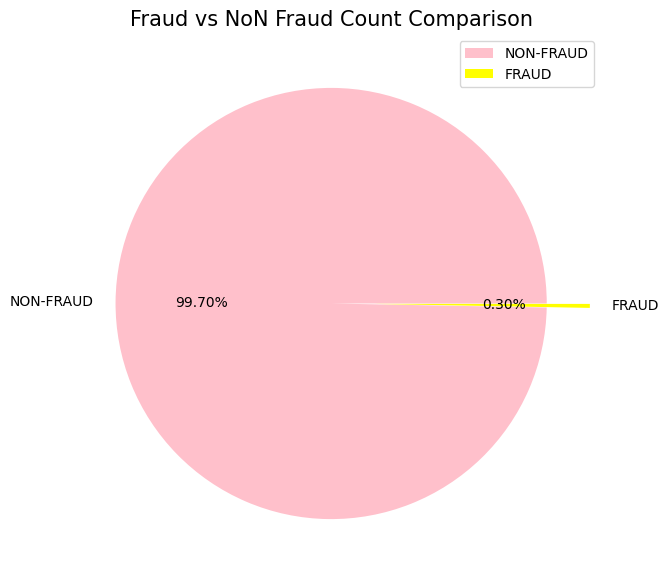

In [ ]:
# plotting a pie chart to represent the fraction of the frauds
size = [count[0], count[1]] #getting values of IsFraud =True and IsFraud=False
labels = ['NON-FRAUD', 'FRAUD']
colors = ['pink', 'yellow']
explode = [0, 0.2]
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = False, autopct = '%.2f%%')
plt.title('Fraud vs NoN Fraud Count Comparison', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

**As we can see that the ratio of IsFraud=True and IsFraud=False is very imbalanced. In order to make each class balanced, we need to use the Anamoly Detection Techniques Such as Over Sampling and Under-Sampling. Here we will use OverSampling as we need to oversample the minority class which is IsFraud=False in our case.**

In [ ]:
#Imblearn library in pythoin which is specifically designed to deal with imbalanced datasets.
#Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases for minority class in any dataset in a balanced way.
#from imblearn.over_sampling, importing Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE
X_resample, Y_resample = SMOTE().fit_resample(X, Y)

# getting the shapes of x and y after resampling
print("Shape of X Before Re-Sampling ", X.shape) #Print the values of Feature Varibale before Re-Sampling
print("Shape of X After Re-Sampling", X_resample.shape) #Print the values of Feature Varibale after Re-Sampling
print("Shape of Y Before Re-Sampling", Y.shape)  #Print the values of Target Varibale before Re-Sampling
print("Shape of Y After Re-Sampling", Y_resample.shape)  #Print the values of Target Varibale after Re-Sampling

In [ ]:
# checking the no. of frauds in the dataset after re-sampling
count_resample=Y_resample.value_counts() #Saving the count of IsFraud=True and IsFraud=False in a Variable after re-sampling

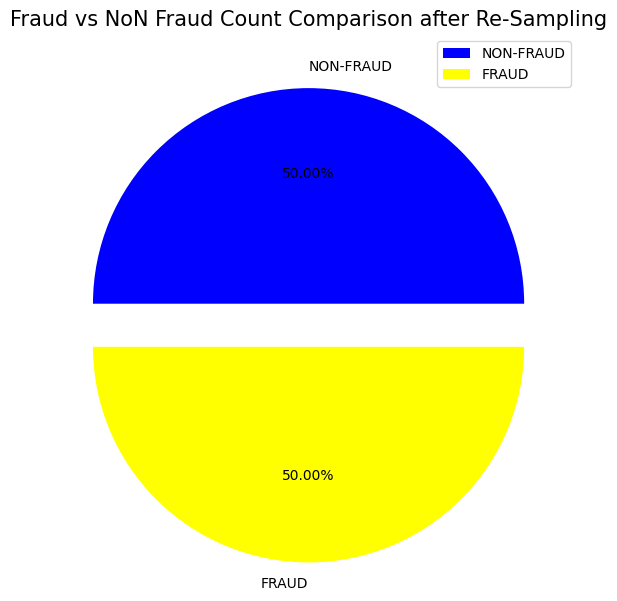

In [ ]:
# plotting a pie chart to represent the fraction of the frauds
size = [count_resample[0], count_resample[1]] #getting values of IsFraud =True and IsFraud=False after re_sampling
labels = ['NON-FRAUD', 'FRAUD']
colors = ['blue', 'yellow']
explode = [0, 0.2]
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow  = False, autopct = '%.2f%%')
plt.title('Fraud vs NoN Fraud Count Comparison after Re-Sampling', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

**Splitting our dataset into Train and Test data using the split ratio as 25:75.**

In [ ]:
from sklearn.model_selection import train_test_split # importing train_test_split function from Sklearn
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_resample,Y_resample,test_size=0.25,random_state=42) #splitting data into test and train using the split ratio as 25:75

# Printing the new shapes
print("Shape of x_train: ", Xtrain.shape) #print the shape of Features variable used for training
print("Shape of x_test: ", Xtest.shape)   #print the shape of Features variable used for testing
print("Shape of y_train: ", Ytrain.shape) #print the shape of Target variable  used for training
print("Shape of y_test: ", Ytest.shape)    #print the shape of Target variable  used for testing

Shape of x_train:  (4143294, 7)
Shape of x_test:  (1381098, 7)
Shape of y_train:  (4143294,)
Shape of y_test:  (1381098,)


In [ ]:
#Performing Standardization on the dataset using Standard Scaler
from sklearn.preprocessing import StandardScaler #Importing Standard Scaler from Scikit Learn library
sc = StandardScaler()  #creating an instance of Standard Scaler
Xtrain = sc.fit_transform(Xtrain) #Standardization of Training Data (Features)
Xtest = sc.transform(Xtest)       #Standardization of Testing Data (Features)


#Training Classification Models
In this section, we will train couple of classification models using our training dataset. We will perform predictions using testing data once our models are trained.

## K-Nearest Neighbor Classifier
KNN is a Classifier which implements the k-nearest neighbors vote.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Importing KNN Classifier from Scikit Learn library
KNN=KNeighborsClassifier(n_neighbors=5) #creating an instance of KNeighborsClassifier as KNN with N=5
KNN.fit(Xtrain,Ytrain)  #Trainig for model




KNeighborsClassifier()

In [ ]:
KNN_predict=KNN.predict(Xtest)   #Performing Prediction using the Trained KNN model and saving the output values in KNN_predict
# looking at the Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score #importing confusion matrix and accuracy score functions from scikit learn library
CM_KNN= confusion_matrix(Ytest, KNN_predict) #calculating the confusion matrix of predictions
AC_KNN=accuracy_score(Ytest, KNN_predict) #calculating the accuracy score of predictions
print('Accuracy Score of Decision Tree Classifier in Percentage is :',AC_KNN*100) #printing the confusion matrix of predictions
print('Confusion Matrix of Decision Tree Classifier is :',CM_KNN) #printing the confusion matrix of predictions

Accuracy Score of Decision Tree Classifier in Percentage is : 98.71080835682913
Confusion Matrix of Decision Tree Classifier is : [[675986  13846]
 [  3959 687307]]


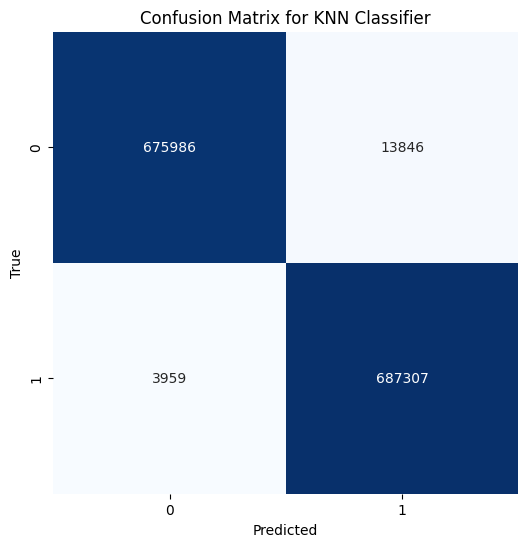

In [ ]:
# Plot confusion matrix for KNN  Classifier
plt.figure(figsize=(6, 6))
sb.heatmap(CM_KNN, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(Ytest),
            yticklabels=np.unique(Ytest))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## Decision Tree Classifier
Decision Tree Classifier creates a creates a model by building a decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier  #Importing Decision Tree Classifier from Scikit Learn library
DTC=DecisionTreeClassifier(max_depth=10,random_state=0) #creating an instance of KNeighborsClassifier as KNN with N=5
DTC.fit(Xtrain,Ytrain)  #Trainig for model


DecisionTreeClassifier(max_depth=10, random_state=0)

In [ ]:
DTC_predict=DTC.predict(Xtest) #Performing Prediction using the Trained Decision Tree Classifier model and saving the output values in DTC_predict
# looking at the Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score #importing confusion matrix and accuracy score functions from scikit learn library
CM_DTC= confusion_matrix(Ytest, DTC_predict) #calculating the confusion matrix of predictions
AC_DTC=accuracy_score(Ytest, DTC_predict) #calculating the accuracy score of predictions
print('Accuracy Score of Decision Tree Classifier in Percentage is :',AC_DTC*100) #printing the confusion matrix of predictions
print('Confusion Matrix of Decision Tree Classifier is :',CM_DTC) #printing the confusion matrix of predictions


Accuracy Score of Decision Tree Classifier in Percentage is : 99.26609118252289
Confusion Matrix of Decision Tree Classifier is : [[681389   8443]
 [  1693 689573]]


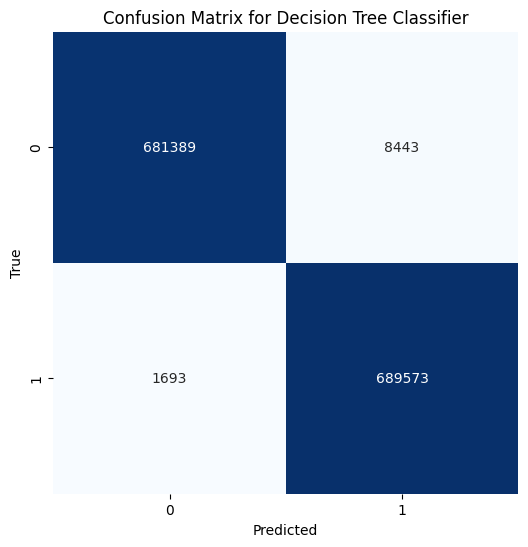

In [ ]:
# Plot confusion matrix for Decision Tree Classifier
plt.figure(figsize=(6, 6))
sb.heatmap(CM_DTC, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(Ytest),
            yticklabels=np.unique(Ytest))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Compairing the Accuracy of currently running model vs our trained model
In this section, we will try to compare the accuracy of the model in used vs our model to justify the improvement made in this project.


In [ ]:
print('Number of Actual Fraud Transactions = ',values[1])
print('Number of values predicteds by Old Model as Fraud Transactions = ',values1[1])
AC_Old=(values1[1]/values[1]) #calculating the accuracy score of predictions
print('Accuracy of Old Model =',AC_Old)
print('Accuracy of Old Model in Percentage =',AC_Old*100)
print('Accuracy of our Trained Model in Percentage = ',AC_DTC*100)

Number of Actual Fraud Transactions =  8213
Number of values predicteds by Old Model as Fraud Transactions =  16
Accuracy of Old Model = 0.0019481310118105442
Accuracy of Old Model in Percentage = 0.1948131011810544
Accuracy of our Trained Model in Percentage =  99.26609118252289
